In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./files/diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns="Unnamed: 0", inplace= True)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.shape

(53940, 10)

<Axes: xlabel='cut', ylabel='count'>

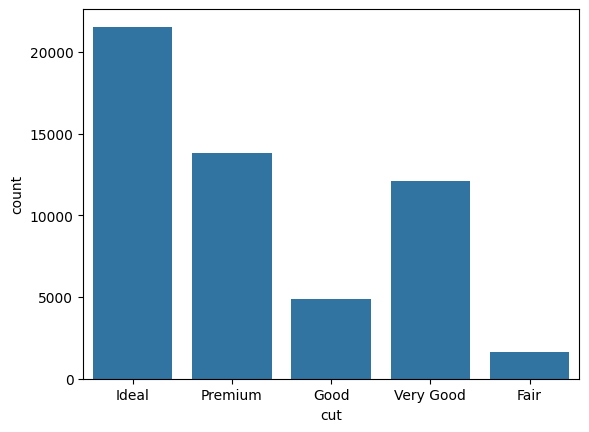

In [10]:
sns.countplot(x= df["cut"])

<Axes: xlabel='price', ylabel='Count'>

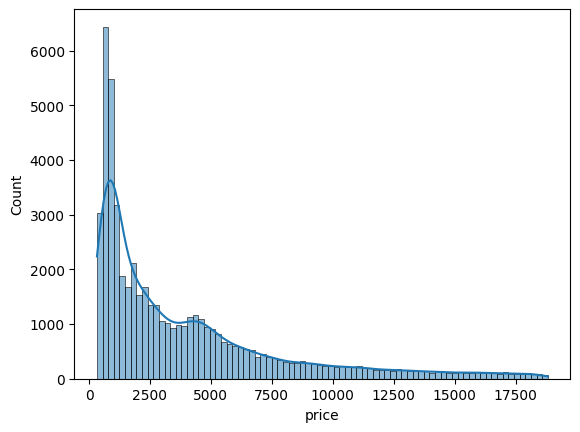

In [11]:
sns.histplot(df['price'], kde = True)

In [12]:
df.duplicated().sum()

np.int64(146)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5*iqr)
    uf = q3+(1.5*iqr)
    print("LF",lf)
    print("UF",uf)

In [16]:
IQR(df["depth"])

LF 58.75
UF 64.75


{'whiskers': [<matplotlib.lines.Line2D at 0x1ab5d0e9450>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab5d0e96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab5d0e9310>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab5d0e9950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab5d0e9a90>],
 'means': []}

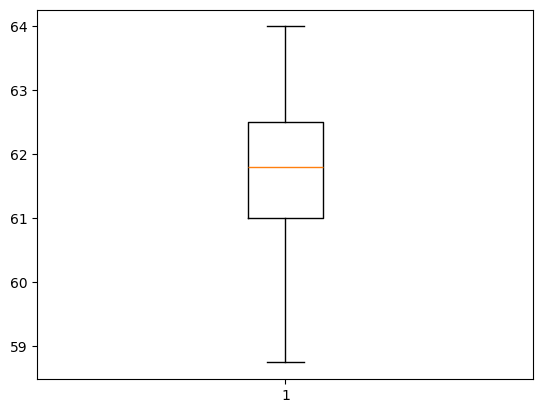

In [35]:
plt.boxplot(df["depth"])

In [34]:
df["depth"] = np.where(df["depth"]<58.75, 58.75, df["depth"])